# **Small offline social network similarity and complementarity coefficients**

In [3]:
from lib import *
from pathlib import Path
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statannotations.Annotator import Annotator
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

In [4]:
import pandas as pd
data = pd.DataFrame()
df = pd.read_csv("C:\\Users\\hajiabukar_s\\network_science_final\\uzh-network-science-project\\code\\results\structural_measures_small_offline.csv", sep=',')
data = pd.concat([data, df])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ec76359c90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec7635a1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec763599f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ec7635a710>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ec7635a9b0>,
 'means': []}

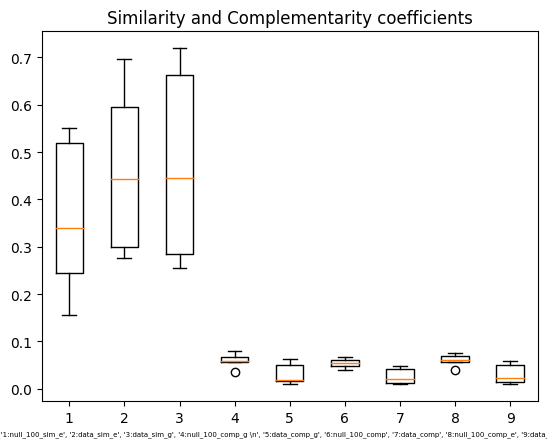

In [5]:
plt.title('Similarity and Complementarity coefficients')
plt.xlabel('Coefficient')
plt.xlabel(["1:null_100_sim_e","2:data_sim_e","3:data_sim_g","4:null_100_comp_g \n","5:data_comp_g","6:null_100_comp","7:data_comp","8:null_100_comp_e","9:data_comp_e"],fontsize=5)
plt.boxplot([df["null_100_sim_e"][:6],df["data_sim_e"][:6],df["data_sim_g"][:6],df["null_100_comp_g"][:6],df["data_comp_g"][:6],df["null_100_comp"][:6],df["data_comp"][:6],df["null_100_comp_e"][:6],df["data_comp_e"][:6]])


{'whiskers': [<matplotlib.lines.Line2D at 0x1ec765cbf70>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec765fc3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec765cbcd0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ec765fc910>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ec765fcbb0>,
 'means': []}

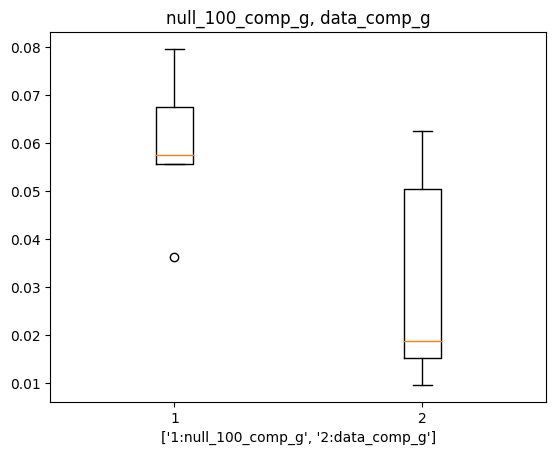

In [6]:
plt.title('null_100_comp_g, data_comp_g')
plt.xlabel('Coefficient')
plt.xlabel(["1:null_100_comp_g","2:data_comp_g"])
plt.boxplot([df["null_100_comp_g"][:6],df["data_comp_g"][:6]])


{'whiskers': [<matplotlib.lines.Line2D at 0x1ec76679270>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec76679690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec76678fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ec76679bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ec76679e70>,
 'means': []}

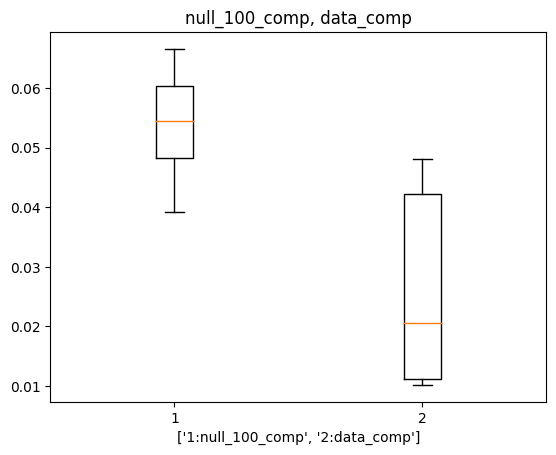

In [7]:
plt.title('null_100_comp, data_comp')
plt.xlabel('Coefficient')
plt.xlabel(["1:null_100_comp","2:data_comp"])
plt.boxplot([df["null_100_comp"][:6],df["data_comp"][:6]])


{'whiskers': [<matplotlib.lines.Line2D at 0x1ec764b1720>,
 'caps': [<matplotlib.lines.Line2D at 0x1ec764b1c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ec764b1480>,
 'medians': [<matplotlib.lines.Line2D at 0x1ec764b21d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ec764b2470>,
 'means': []}

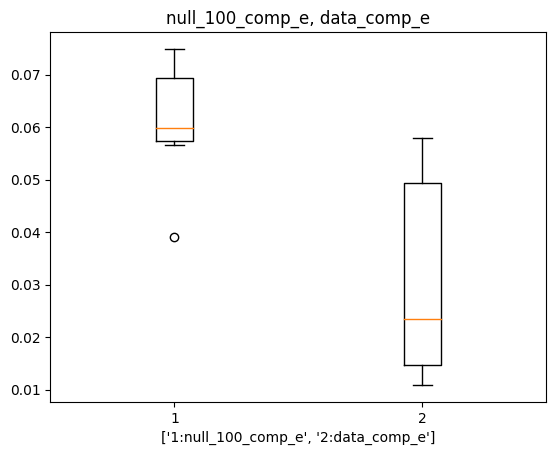

In [8]:
plt.title('null_100_comp_e, data_comp_e')
plt.xlabel('Coefficient')
plt.xlabel(["1:null_100_comp_e","2:data_comp_e"])
plt.boxplot([df["null_100_comp_e"][:6],df["data_comp_e"][:6]])


C:\Users\hajiabukar_s\AppData\Local\Temp\ipykernel_6964\2488116298.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<AxesSubplot: >

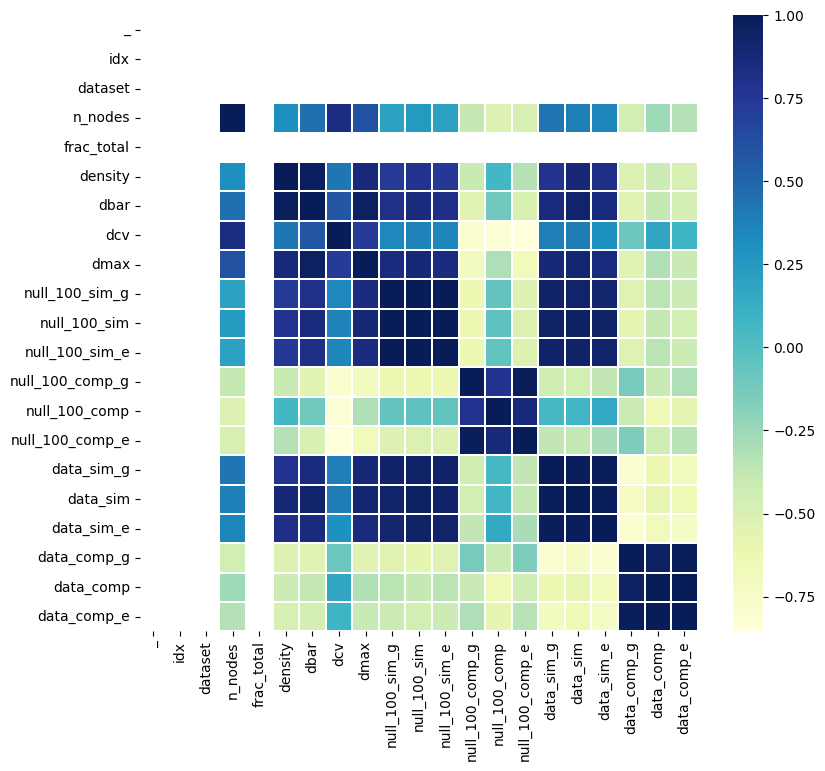

In [9]:
corrmat = data.corr()

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


In [10]:
df

,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,dmax,...,null_100_sim_e,null_100_comp_g,null_100_comp,null_100_comp_e,data_sim_g,data_sim,data_sim_e,data_comp_g,data_comp,data_comp_e
0,0,1,NaN,77,34,1.0,0.137255,4.529412,0.828221,16,...,0.244778,0.059003,0.050048,0.059796,0.258317,0.237123,0.276156,0.062609,0.048105,0.057827
1,0,1,NaN,78,34,1.0,0.139037,4.588235,0.832643,17,...,0.243592,0.055586,0.047638,0.056538,0.255682,0.239593,0.275417,0.060734,0.047097,0.056215
2,0,1,NaN,november17,22,1.0,0.285714,6.000000,0.596708,14,...,0.433280,0.070446,0.066582,0.072405,0.528662,0.429924,0.521119,0.019119,0.013873,0.018306
3,0,1,NaN,sp_hospital,75,1.0,11.684324,864.640000,1.106573,4286,...,0.551635,0.036217,0.039160,0.039040,0.708105,0.587710,0.620922,0.018439,0.027397,0.028573
4,0,1,NaN,sp_kenyan_households,47,1.0,30.197040,1389.063830,0.884969,4193,...,0.546627,0.056188,0.060735,0.059923,0.719568,0.686484,0.696276,0.009628,0.010332,0.010902
5,0,1,NaN,terrorists_911,62,1.0,0.080381,4.903226,0.815551,22,...,0.156117,0.079644,0.058863,0.074901,0.360882,0.292575,0.365698,0.014225,0.010214,0.013378


In [15]:
karate_77_data_sim


,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,dmax,...,null_100_sim_e,null_100_comp_g,null_100_comp,null_100_comp_e,data_sim_g,data_sim,data_sim_e,data_comp_g,data_comp,data_comp_e
0,0,1,NaN,77,34,1.0,0.137255,4.529412,0.828221,16,...,0.244778,0.059003,0.050048,0.059796,0.258317,0.237123,0.276156,0.062609,0.048105,0.057827
1,0,1,NaN,78,34,1.0,0.139037,4.588235,0.832643,17,...,0.243592,0.055586,0.047638,0.056538,0.255682,0.239593,0.275417,0.060734,0.047097,0.056215
2,0,1,NaN,november17,22,1.0,0.285714,6.000000,0.596708,14,...,0.433280,0.070446,0.066582,0.072405,0.528662,0.429924,0.521119,0.019119,0.013873,0.018306
3,0,1,NaN,sp_hospital,75,1.0,11.684324,864.640000,1.106573,4286,...,0.551635,0.036217,0.039160,0.039040,0.708105,0.587710,0.620922,0.018439,0.027397,0.028573
4,0,1,NaN,sp_kenyan_households,47,1.0,30.197040,1389.063830,0.884969,4193,...,0.546627,0.056188,0.060735,0.059923,0.719568,0.686484,0.696276,0.009628,0.010332,0.010902
5,0,1,NaN,terrorists_911,62,1.0,0.080381,4.903226,0.815551,22,...,0.156117,0.079644,0.058863,0.074901,0.360882,0.292575,0.365698,0.014225,0.010214,0.013378
